<a href="https://colab.research.google.com/github/AmirBassemAdibAbdou/ImageProcessingProject/blob/main/MediaAssignmentOne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

img = cv2.imread('/content/secret_image .csv')
image_data = np.loadtxt('/content/secret_image .csv', delimiter=',')
cv2.imwrite('grayscale_image.png', image_data) # save grayscale image



True

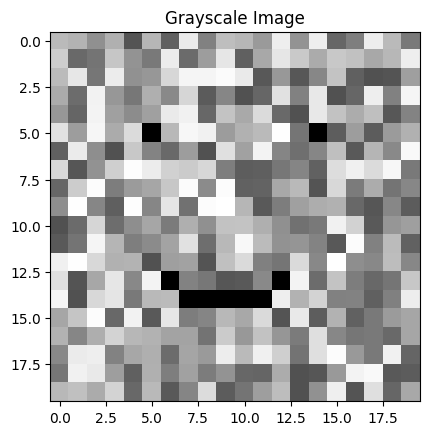

In [ ]:
# Display using Matplotlib (for Colab notebooks)
plt.imshow(image_data, cmap='gray')
plt.title('Grayscale Image')
plt.show()

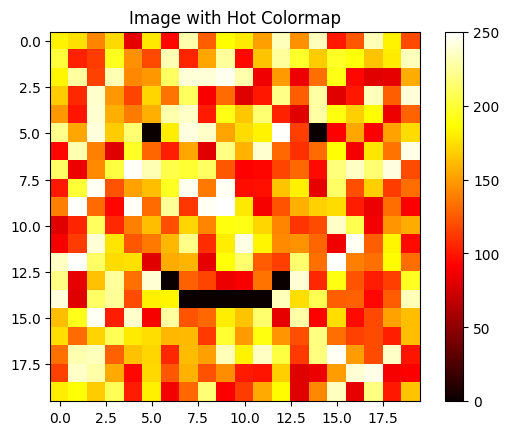

In [ ]:
# Visualize with 'hot' colormap
plt.imshow(image_data, cmap='hot')
plt.title('Image with Hot Colormap')
plt.colorbar()  # Add a colorbar to understand the mapping
plt.savefig('hot_colormap_image.png') # save the image
plt.show()



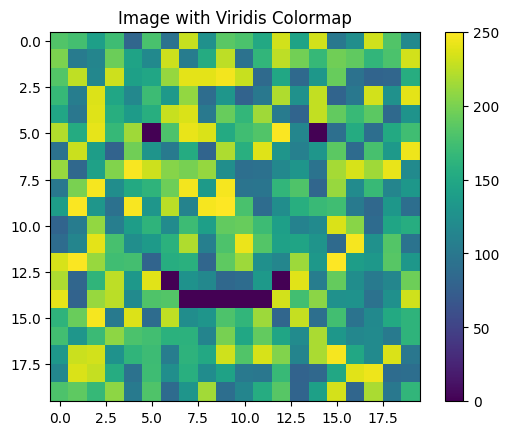

In [ ]:
# Visualize with 'viridis' colormap
plt.imshow(image_data, cmap='viridis')
plt.title('Image with Viridis Colormap')
plt.colorbar()
plt.savefig('viridis_colormap_image.png') # save the image
plt.show()

In [ ]:
# Assuming 'image_data' is your NumPy array
black_pixels_count = np.sum(image_data == 0)
print(f"Number of black pixels: {black_pixels_count}")

Number of black pixels: 9


In [ ]:
black_pixel_coordinates = np.argwhere(image_data == 0)
print("Coordinates of black pixels:\n", black_pixel_coordinates)

Coordinates of black pixels:
 [[ 5  5]
 [ 5 14]
 [13  6]
 [13 12]
 [14  7]
 [14  8]
 [14  9]
 [14 10]
 [14 11]]


In [ ]:
min_x, min_y = black_pixel_coordinates.min(axis=0)
max_x, max_y = black_pixel_coordinates.max(axis=0)

print(f"Bounding box: (min_x={min_x}, min_y={min_y}, max_x={max_x}, max_y={max_y})")

Bounding box: (min_x=5, min_y=5, max_x=14, max_y=14)


In [ ]:
#Analyze the pattern

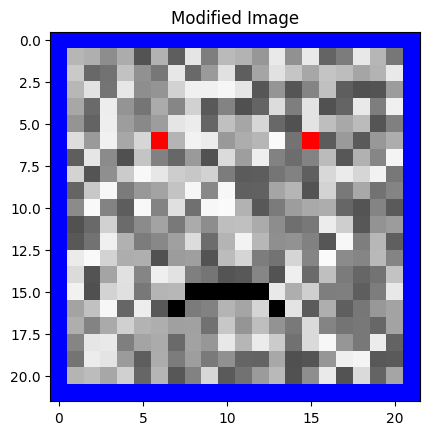

In [ ]:
#Phase3
rgb_image = cv2.cvtColor(image_data.astype(np.uint8), cv2.COLOR_GRAY2BGR)

eye_coordinates = [(5,5), (14, 5)]

for coord in eye_coordinates:
    rgb_image[coord[1], coord[0]] = [255, 0, 0]  # Red color for eyes

cv2.imwrite('colored_image.png', rgb_image)

outh_coordinates = [(13, 6), (13, 12)]
mouth_coordinatesTwo = [(x, y + 2) for x, y in mouth_coordinates]  # Shift 2 pixels down

for i in range(len(mouth_coordinates)):
    # Get coordinates for both sets
    coord1 = mouth_coordinates[i]  # (x, y) of original mouth
    coord2 = mouth_coordinatesTwo[i] # (x, y) of shifted mouth

    # Set pixel color of coord1 to the color of coord2
    rgb_image[coord1[1], coord1[0]] = rgb_image[coord2[1], coord2[0]]
    rgb_image[coord2[1], coord2[0]] = [0, 0, 0]

cv2.imwrite('colored_image.png', rgb_image)

rgb_image = cv2.copyMakeBorder(rgb_image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=[0, 0, 255])
cv2.imwrite('modified_image.png', rgb_image)

plt.imshow(rgb_image)
plt.title('Modified Image')
plt.show()

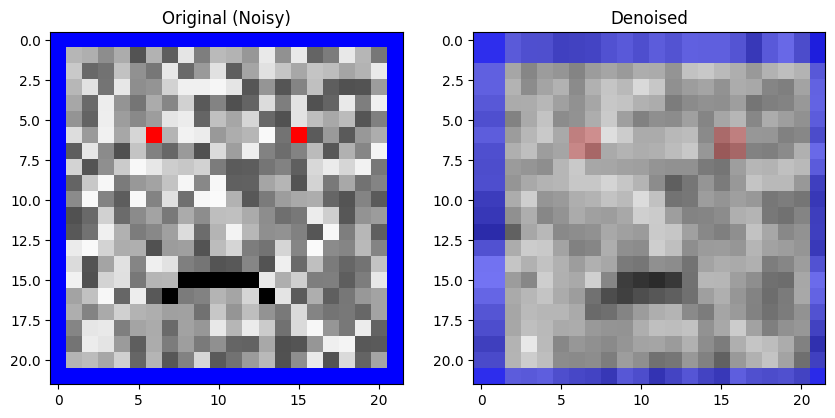

True

In [ ]:
#phase4

modified_image = cv2.imread("/content/modified_image.png")

denoised_image = cv2.blur(modified_image, (2, 2))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(modified_image)
axes[0].set_title('Original (Noisy)')

axes[1].imshow(denoised_image)
axes[1].set_title('Denoised')

plt.show()

cv2.imwrite('noisy_image.png', modified_image)
cv2.imwrite('denoised_image.png', denoised_image)